<a href="https://colab.research.google.com/github/calmrocks/master-machine-learning-engineer/blob/main/BasicConcepts/Stationary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Stationarity in Time Series

## What is Stationarity?

Stationarity is a fundamental concept in time series analysis. A time series is considered stationary when its statistical properties remain constant over time. Specifically, a stationary time series has:

1. Constant mean
2. Constant variance
3. Constant autocovariance

Why is stationarity important?
- Many statistical methods and time series models assume stationarity
- Makes it easier to predict future values
- Helps in understanding the underlying patterns

Let's explore this concept with examples.


In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Set style for better visualizations
plt.style.use('fivethirtyeight')  # or try 'ggplot'

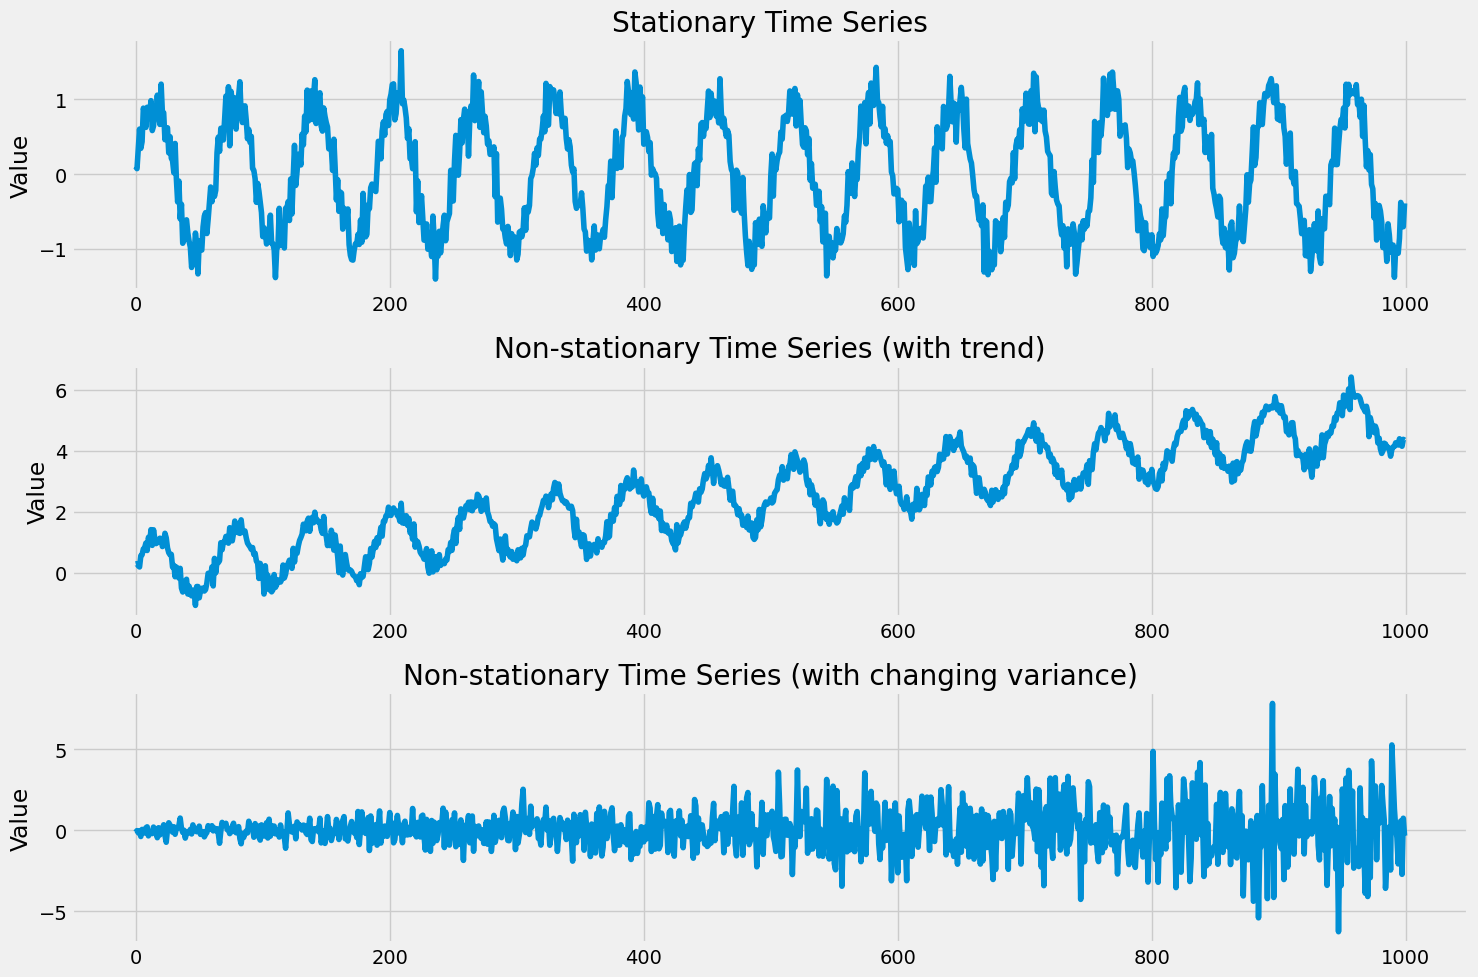

In [13]:
# Generate example time series
np.random.seed(42)

# 1. Stationary Series
t = np.linspace(0, 100, 1000)
stationary = pd.Series(np.sin(t) + np.random.normal(0, 0.2, 1000))

# 2. Non-stationary Series (with trend)
trend = 0.05 * t
non_stationary_trend = pd.Series(np.sin(t) + trend + np.random.normal(0, 0.2, 1000))

# 3. Non-stationary Series (with changing variance)
changing_variance = pd.Series(np.random.normal(0, 0.2 + t/50, 1000))

# Plotting the series
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(stationary)
plt.title('Stationary Time Series')
plt.ylabel('Value')

plt.subplot(3, 1, 2)
plt.plot(non_stationary_trend)
plt.title('Non-stationary Time Series (with trend)')
plt.ylabel('Value')

plt.subplot(3, 1, 3)
plt.plot(changing_variance)
plt.title('Non-stationary Time Series (with changing variance)')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

In [14]:
# Function to check stationarity using Augmented Dickey-Fuller test
def check_stationarity(timeseries, window=12):
    """
    Check stationarity of a time series using:
    1. Rolling statistics (mean and std)
    2. Augmented Dickey-Fuller test
    """

    # Calculate rolling statistics
    rolling_mean = timeseries.rolling(window=window).mean()
    rolling_std = timeseries.rolling(window=window).std()

    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, label='Original')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Augmented Dickey-Fuller test
    print('Results of Augmented Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                            'p-value',
                                            '#Lags Used',
                                            'Number of Observations Used'])

    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value

    print(dfoutput)

    # Interpret results
    if dftest[1] <= 0.05:
        print("\nConclusion: Series is stationary")
    else:
        print("\nConclusion: Series is non-stationary")

Checking stationarity for the stationary series:


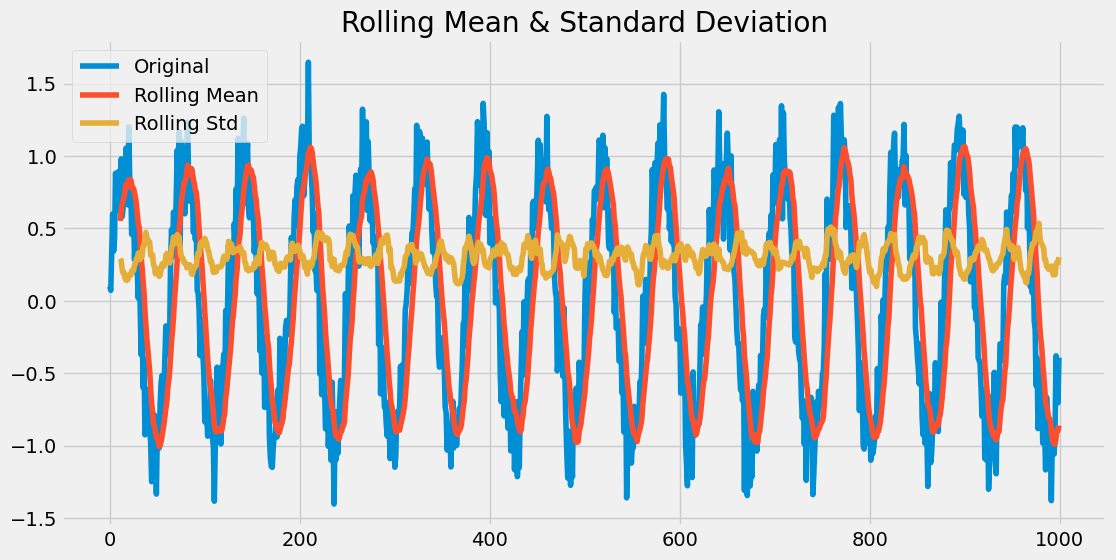

Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.447443e+01
p-value                        6.524831e-27
#Lags Used                     2.200000e+01
Number of Observations Used    9.770000e+02
Critical Value (1%)           -3.437061e+00
Critical Value (5%)           -2.864503e+00
Critical Value (10%)          -2.568348e+00
dtype: float64

Conclusion: Series is stationary

Checking stationarity for the non-stationary series with trend:


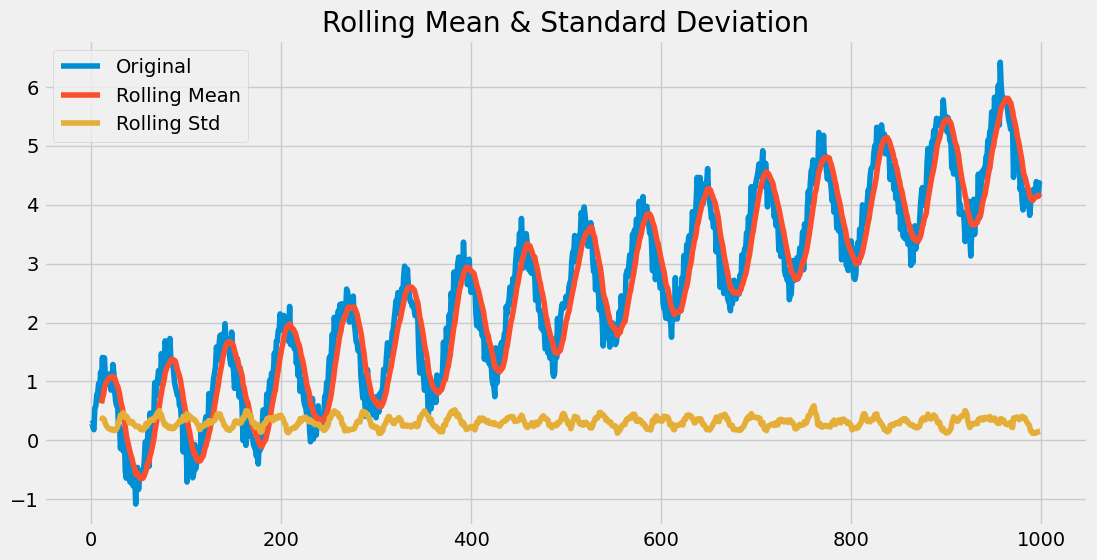

Results of Augmented Dickey-Fuller Test:
Test Statistic                  -1.775623
p-value                          0.392630
#Lags Used                      22.000000
Number of Observations Used    977.000000
Critical Value (1%)             -3.437061
Critical Value (5%)             -2.864503
Critical Value (10%)            -2.568348
dtype: float64

Conclusion: Series is non-stationary


In [15]:
# Check stationarity for our example series
print("Checking stationarity for the stationary series:")
check_stationarity(stationary)

print("\nChecking stationarity for the non-stationary series with trend:")
check_stationarity(non_stationary_trend)

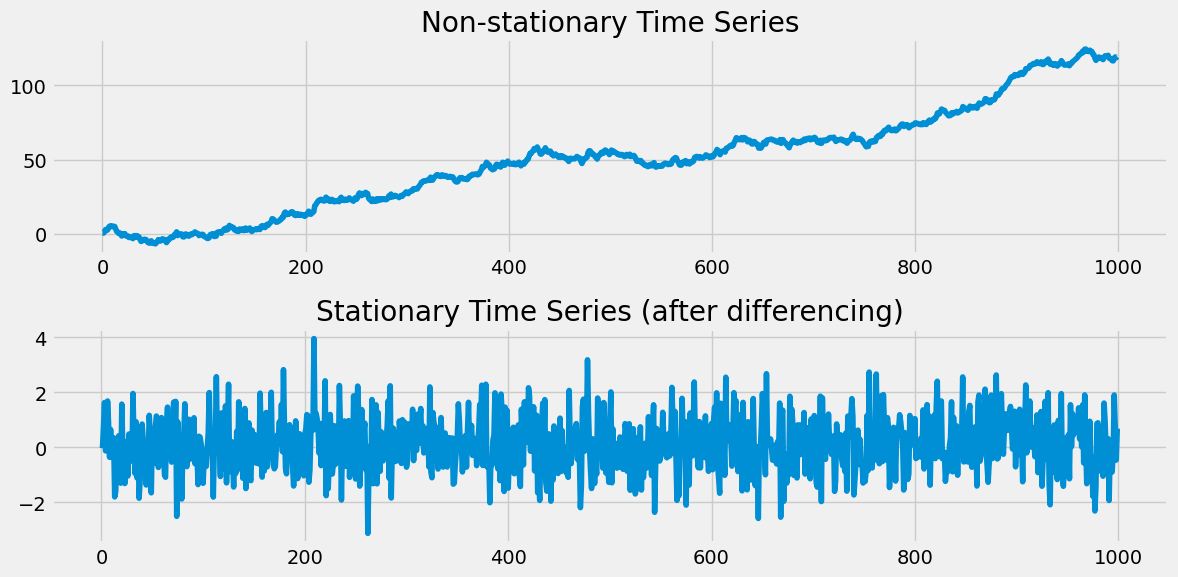

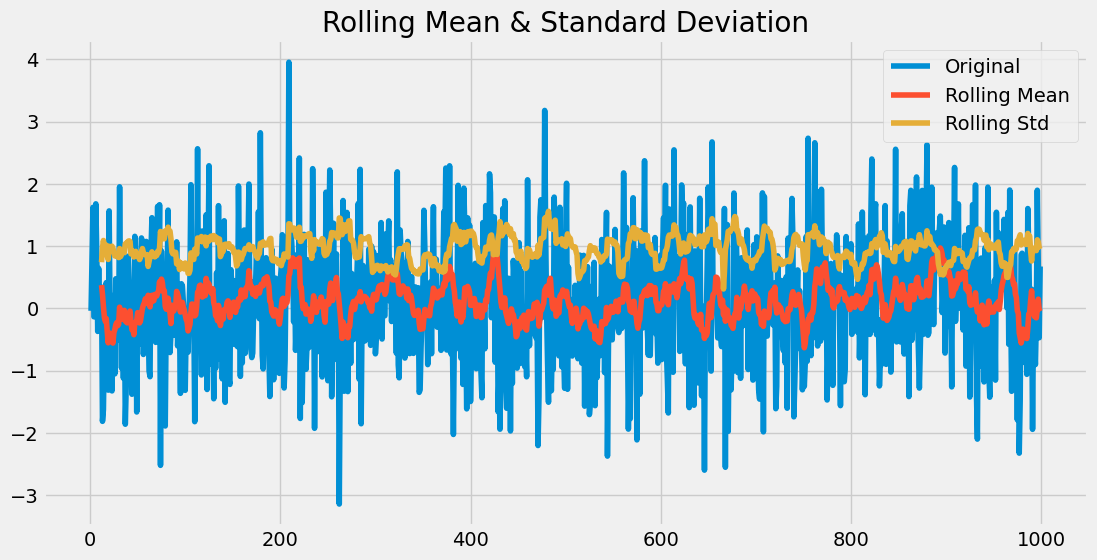

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -31.789311
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    998.000000
Critical Value (1%)             -3.436919
Critical Value (5%)             -2.864440
Critical Value (10%)            -2.568314
dtype: float64

Conclusion: Series is stationary


In [16]:
# Making a non-stationary series stationary
# Example with differencing

# Create a non-stationary series with trend
np.random.seed(42)
non_stationary = pd.Series(np.cumsum(np.random.normal(0.1, 1, 1000)))

# Apply differencing
stationary_diff = non_stationary.diff().dropna()

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(non_stationary)
plt.title('Non-stationary Time Series')

plt.subplot(2, 1, 2)
plt.plot(stationary_diff)
plt.title('Stationary Time Series (after differencing)')
plt.tight_layout()
plt.show()

# Check stationarity of the differenced series
check_stationarity(stationary_diff)

# Stationarity Tests in Time Series

## 1. Augmented Dickey-Fuller (ADF) Test
- Null Hypothesis (H0): The time series has a unit root (non-stationary)
- Alternative Hypothesis (H1): The time series has no unit root (stationary)
- If p-value < significance level (e.g., 0.05), we reject H0 and conclude the series is stationary

## 2. KPSS Test (Kwiatkowski-Phillips-Schmidt-Shin)
- Null Hypothesis (H0): The time series is trend stationary
- Alternative Hypothesis (H1): The time series has a unit root (non-stationary)
- If p-value < significance level (e.g., 0.05), we reject H0 and conclude the series is non-stationary

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
warnings.filterwarnings('ignore')


In [18]:
def perform_stationarity_tests(series, series_name="Time Series"):
    """
    Perform both ADF and KPSS tests on a time series
    """
    print(f"Stationarity Tests for {series_name}")
    print("="*50)

    # ADF Test
    print("Augmented Dickey-Fuller Test:")
    adf_result = adfuller(series)

    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'\t{key}: {value:.4f}')

    # Interpretation of ADF test
    if adf_result[1] < 0.05:
        print("\nADF Test Conclusion: Series is Stationary (reject H0)")
    else:
        print("\nADF Test Conclusion: Series is Non-stationary (fail to reject H0)")

    print("\n" + "-"*50)

    # KPSS Test
    print("\nKPSS Test:")
    kpss_result = kpss(series)

    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print('Critical Values:')
    for key, value in kpss_result[3].items():
        print(f'\t{key}: {value:.4f}')

    # Interpretation of KPSS test
    if kpss_result[1] < 0.05:
        print("\nKPSS Test Conclusion: Series is Non-stationary (reject H0)")
    else:
        print("\nKPSS Test Conclusion: Series is Stationary (fail to reject H0)")

    print("\n" + "="*50)

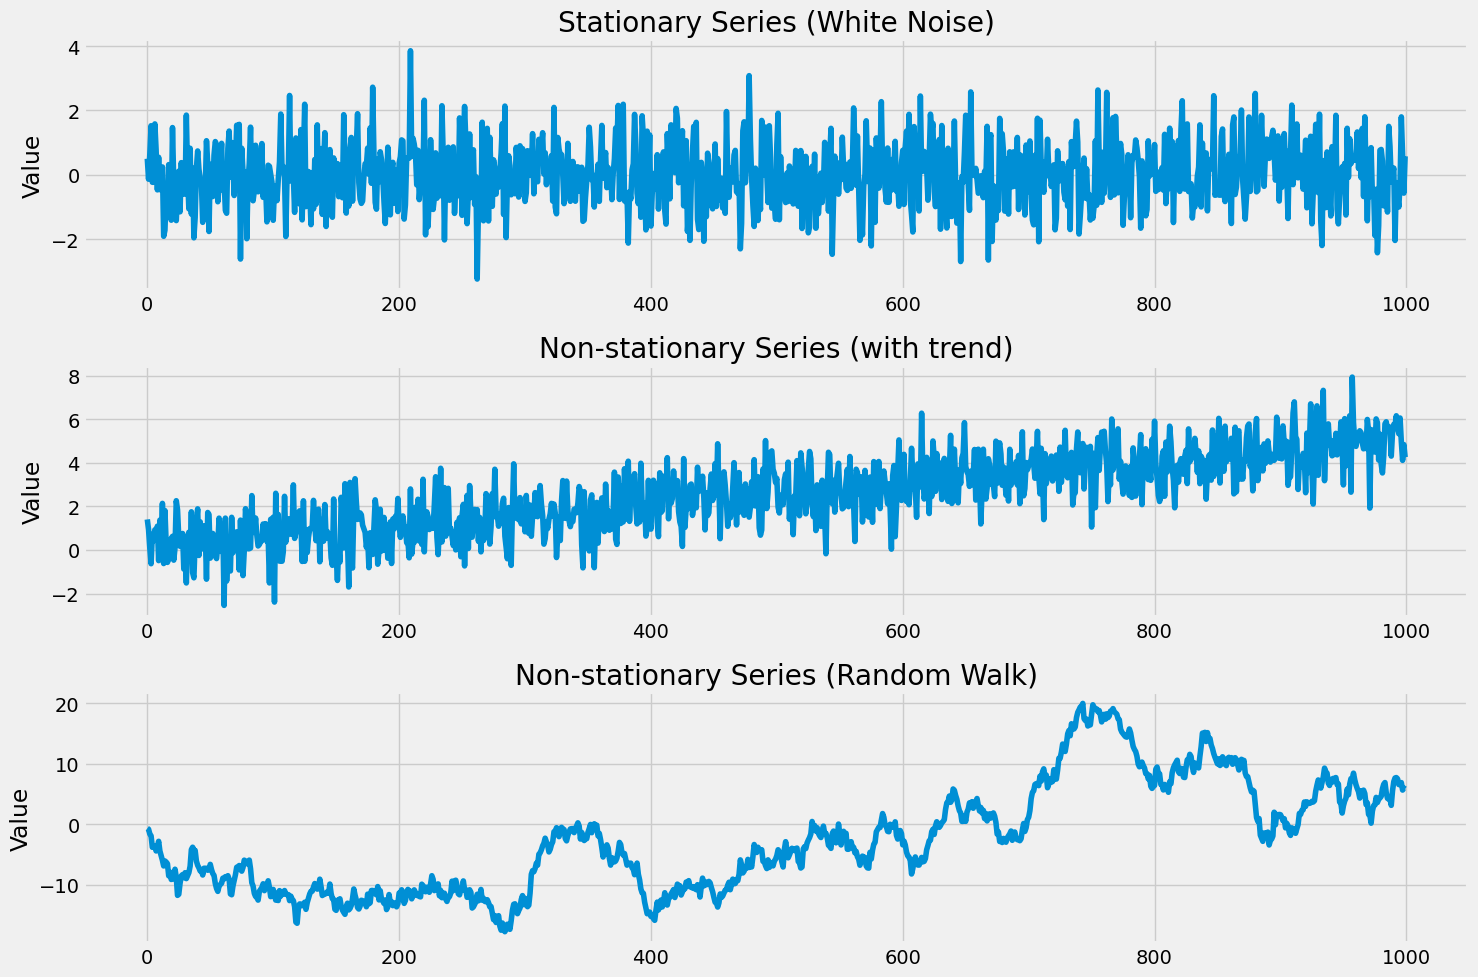

In [19]:
# Generate different types of time series for testing

# 1. Stationary series (white noise)
np.random.seed(42)
stationary_series = pd.Series(np.random.normal(0, 1, 1000))

# 2. Non-stationary series with trend
t = np.linspace(0, 100, 1000)
trend_series = pd.Series(0.05 * t + np.random.normal(0, 1, 1000))

# 3. Non-stationary series with random walk
random_walk = pd.Series(np.cumsum(np.random.normal(0, 1, 1000)))

# Plot the series
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(stationary_series)
plt.title('Stationary Series (White Noise)')
plt.ylabel('Value')

plt.subplot(3, 1, 2)
plt.plot(trend_series)
plt.title('Non-stationary Series (with trend)')
plt.ylabel('Value')

plt.subplot(3, 1, 3)
plt.plot(random_walk)
plt.title('Non-stationary Series (Random Walk)')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

In [20]:
# Perform stationarity tests on each series
perform_stationarity_tests(stationary_series, "Stationary Series (White Noise)")
print("\n")
perform_stationarity_tests(trend_series, "Non-stationary Series (with trend)")
print("\n")
perform_stationarity_tests(random_walk, "Non-stationary Series (Random Walk)")

Stationarity Tests for Stationary Series (White Noise)
Augmented Dickey-Fuller Test:
ADF Statistic: -31.8111
p-value: 0.0000
Critical Values:
	1%: -3.4369
	5%: -2.8644
	10%: -2.5683

ADF Test Conclusion: Series is Stationary (reject H0)

--------------------------------------------------

KPSS Test:
KPSS Statistic: 0.1871
p-value: 0.1000
Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390

KPSS Test Conclusion: Series is Stationary (fail to reject H0)



Stationarity Tests for Non-stationary Series (with trend)
Augmented Dickey-Fuller Test:
ADF Statistic: -0.6245
p-value: 0.8654
Critical Values:
	1%: -3.4371
	5%: -2.8645
	10%: -2.5683

ADF Test Conclusion: Series is Non-stationary (fail to reject H0)

--------------------------------------------------

KPSS Test:
KPSS Statistic: 5.2397
p-value: 0.0100
Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390

KPSS Test Conclusion: Series is Non-stationary (reject H0)



Stationarity Tests for Non-stationary Se

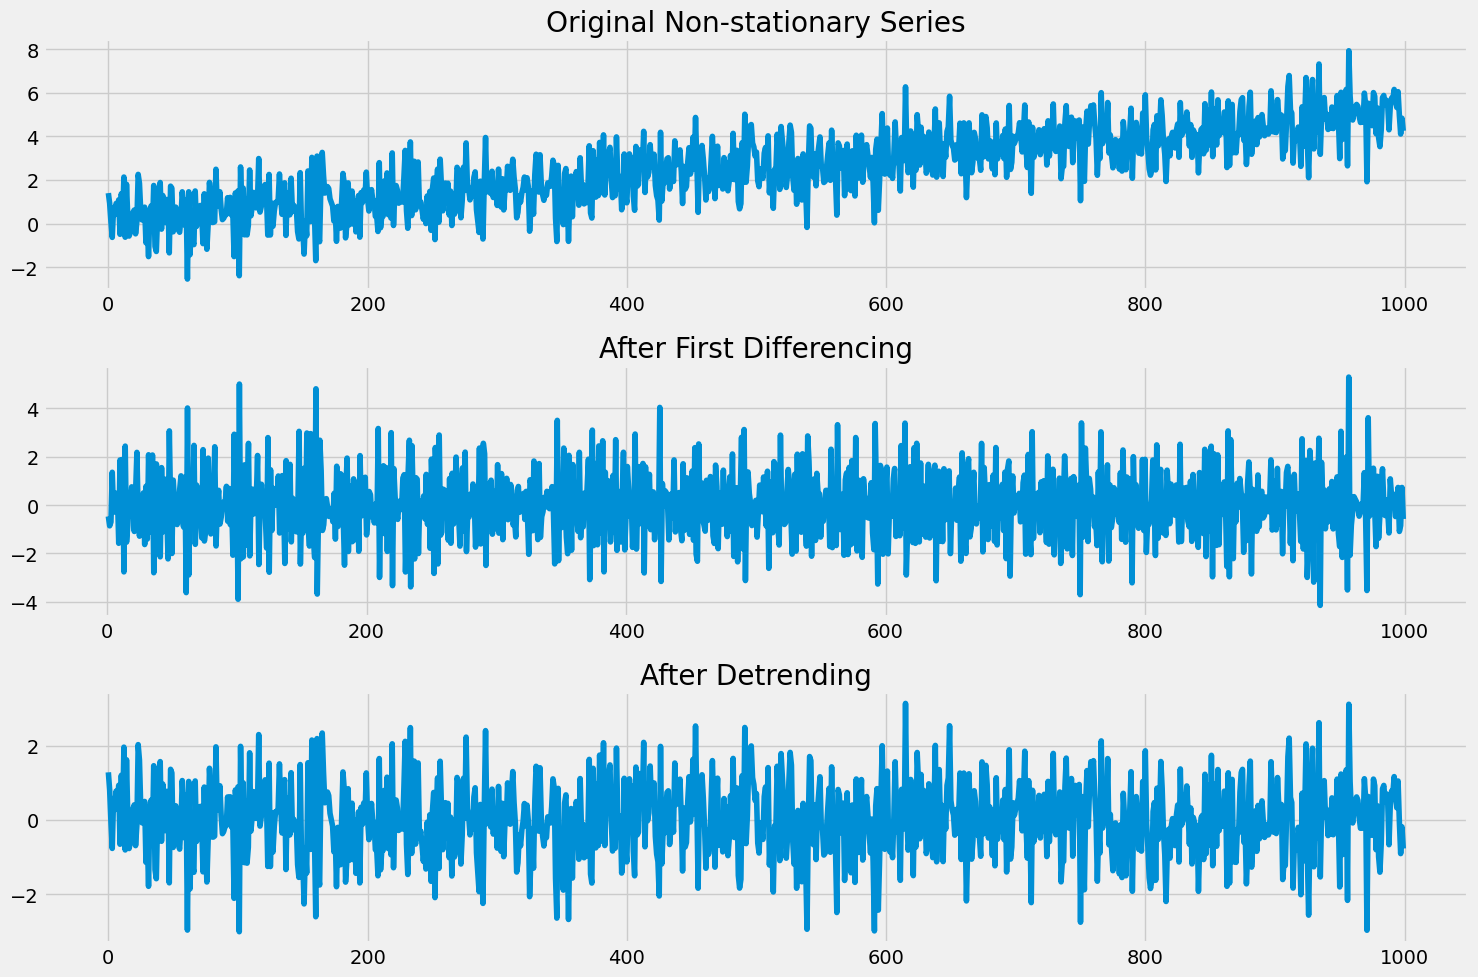


Stationarity tests after differencing:
Stationarity Tests for Differenced Series
Augmented Dickey-Fuller Test:
ADF Statistic: -12.2283
p-value: 0.0000
Critical Values:
	1%: -3.4371
	5%: -2.8645
	10%: -2.5683

ADF Test Conclusion: Series is Stationary (reject H0)

--------------------------------------------------

KPSS Test:
KPSS Statistic: 0.0932
p-value: 0.1000
Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390

KPSS Test Conclusion: Series is Stationary (fail to reject H0)


Stationarity tests after detrending:
Stationarity Tests for Detrended Series
Augmented Dickey-Fuller Test:
ADF Statistic: -32.0688
p-value: 0.0000
Critical Values:
	1%: -3.4369
	5%: -2.8644
	10%: -2.5683

ADF Test Conclusion: Series is Stationary (reject H0)

--------------------------------------------------

KPSS Test:
KPSS Statistic: 0.0462
p-value: 0.1000
Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390

KPSS Test Conclusion: Series is Stationary (fail to reject H0)



In [21]:
# Example of making non-stationary series stationary
def make_stationary(series):
    """
    Apply different transformations to make series stationary
    """
    # First difference
    diff_series = series.diff().dropna()

    # Detrending (using linear regression)
    from scipy import stats
    x = np.arange(len(series))
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, series)
    trend = x * slope + intercept
    detrended_series = series - trend

    # Plot results
    plt.figure(figsize=(15, 10))

    plt.subplot(3, 1, 1)
    plt.plot(series)
    plt.title('Original Non-stationary Series')

    plt.subplot(3, 1, 2)
    plt.plot(diff_series)
    plt.title('After First Differencing')

    plt.subplot(3, 1, 3)
    plt.plot(detrended_series)
    plt.title('After Detrending')

    plt.tight_layout()
    plt.show()

    # Test stationarity of transformed series
    print("\nStationarity tests after differencing:")
    perform_stationarity_tests(diff_series, "Differenced Series")

    print("\nStationarity tests after detrending:")
    perform_stationarity_tests(detrended_series, "Detrended Series")

# Apply transformations to trend series
make_stationary(trend_series)